In this notebook, we determine the optimum thresholds for each model configuration depending on AUPRC value of the model against the test data

In [1]:
from featurizations import featurizations
import pickle
import pandas as pd
from ML_utils import ML_utils
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, average_precision_score
import matplotlib.pyplot as plt

### 1. Determining the optimal threshold for the `by_descending_MW` feasibility model

In [2]:
# ----------------- Start defining fingerprinting parameters -----------------
fp_type = 'ecfp4'
cofactor_configuration = 'by_descending_MW'
max_species = 4
dataset = 'all_BKM_rxns'
query_rules = 'all'  # either 'all' or a list like ['rule0006','rule0007']
model_type = 'XGBoost'
random_state = 42
# ----------------- End defining fingerprinting parameters -----------------

In [3]:
# specify the input filepath of the trained AdH ML model to load into memory
if dataset == 'all_AdH_rxns':
    # specify filepath to load in saved AdH model
    input_model_filepath = f'../../models/indiv_models/all_AdH_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained Monox ML model to load into memory
if dataset == 'all_Monox_rxns':
    # specify filepath to load in saved Monox model
    input_model_filepath = f'../../models/indiv_models/all_Monox_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained, consolidated ML model to load into memory
if dataset == 'all_BKM_rxns':
    if query_rules == 'all':

        # specify filepath to load in the complete, consolidated model trained on all BKM reactions
        input_model_filepath = f'../../models/consolidated_models/all_BKM_rxns_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

    else:

        # specify filepath to load in model specific to certain query rules
        input_model_filepath = f'../../models/params/{query_rules}_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

### load in selected model
model = pickle.load(open(input_model_filepath, 'rb'))

print(f'\nSaved Feasibility model loaded: {input_model_filepath}')
print('')


Saved Feasibility model loaded: ../../models/consolidated_models/all_BKM_rxns_ecfp4_XGBoost_4_by_descending_MW.pkl



In [4]:
if dataset == 'all_AdH_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_AdH_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_Monox_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_Monox_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_BKM_rxns':

    if query_rules == 'all':
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_BKM_rxns_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

    else:
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/{query_rules}_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

In [5]:
_, fp_length = ML_utils.initialize_rxn_fp(cofactor_positioning_method = cofactor_configuration,
                                        fp_type = fp_type,
                                        max_species = max_species)

# load in fingerprints and data
test_df = pd.read_parquet(test_fps_filepath)
test_fps = test_df.iloc[:, 0:fp_length].to_numpy()
test_labels = test_df['Label'].to_numpy()

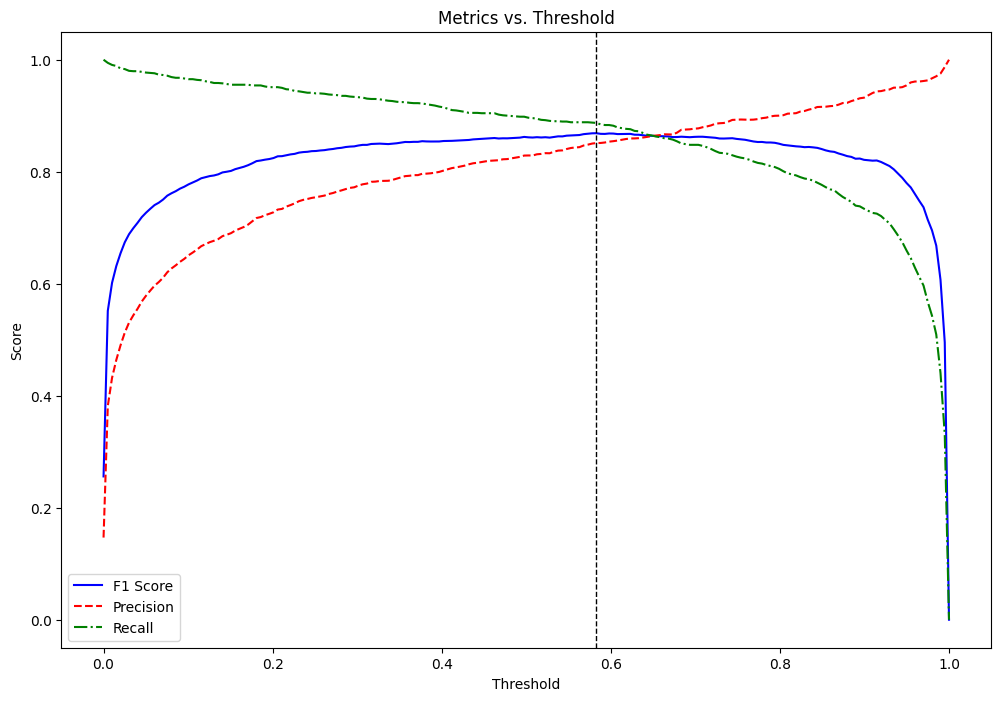

Optimal threshold is: 0.5829145728643216


In [6]:
# Assuming you've trained a classifier and obtained predicted probabilities for class 1
y_prob = model.predict_proba(test_fps)[:, 1]  

# create 200 evenly spaced thresholds between 0 and 1
thresholds = np.linspace(0, 1, 200)  
f1_scores = []
precisions = []
recalls = []

# Inside your loop
for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    f1_scores.append(f1_score(test_labels, y_pred))
    precisions.append(precision_score(test_labels, y_pred, zero_division=1))  # Add zero_division parameter
    recalls.append(recall_score(test_labels, y_pred))


# Plotting
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='red', linestyle='--')
plt.plot(thresholds, recalls, label='Recall', color='green', linestyle='-.')
plt.title('Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(False)

# Determine optimal threshold by selecting the threshold at which model F1 reaches a maximum
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot this optimal threshold as a vertical line
plt.axvline(x = optimal_threshold, color = 'k', linestyle = 'dashed', linewidth = 1)

plt.show()

print(f"Optimal threshold is: {optimal_threshold}")

### 2. Determining the optimal threshold for the `by_ascending_MW` feasibility model

In [7]:
# ----------------- Start defining fingerprinting parameters -----------------
fp_type = 'ecfp4'
cofactor_configuration = 'by_ascending_MW'
max_species = 4
dataset = 'all_BKM_rxns'
query_rules = 'all'  # either 'all' or a list like ['rule0006','rule0007']
model_type = 'XGBoost'
random_state = 42
# ----------------- End defining fingerprinting parameters -----------------

In [8]:
# specify the input filepath of the trained AdH ML model to load into memory
if dataset == 'all_AdH_rxns':
    # specify filepath to load in saved AdH model
    input_model_filepath = f'../../models/indiv_models/all_AdH_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained Monox ML model to load into memory
if dataset == 'all_Monox_rxns':
    # specify filepath to load in saved Monox model
    input_model_filepath = f'../../models/indiv_models/all_Monox_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained, consolidated ML model to load into memory
if dataset == 'all_BKM_rxns':
    if query_rules == 'all':

        # specify filepath to load in the complete, consolidated model trained on all BKM reactions
        input_model_filepath = f'../../models/consolidated_models/all_BKM_rxns_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

    else:

        # specify filepath to load in model specific to certain query rules
        input_model_filepath = f'../../models/params/{query_rules}_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

### load in selected model
model = pickle.load(open(input_model_filepath, 'rb'))

print(f'\nSaved Feasibility model loaded: {input_model_filepath}')
print('')


Saved Feasibility model loaded: ../../models/consolidated_models/all_BKM_rxns_ecfp4_XGBoost_4_by_ascending_MW.pkl



In [9]:
if dataset == 'all_AdH_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_AdH_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_Monox_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_Monox_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_BKM_rxns':

    if query_rules == 'all':
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_BKM_rxns_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

    else:
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/{query_rules}_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

In [10]:
_, fp_length = ML_utils.initialize_rxn_fp(cofactor_positioning_method = cofactor_configuration,
                                        fp_type = fp_type,
                                        max_species = max_species)

# load in fingerprints and data
test_df = pd.read_parquet(test_fps_filepath)
test_fps = test_df.iloc[:, 0:fp_length].to_numpy()
test_labels = test_df['Label'].to_numpy()

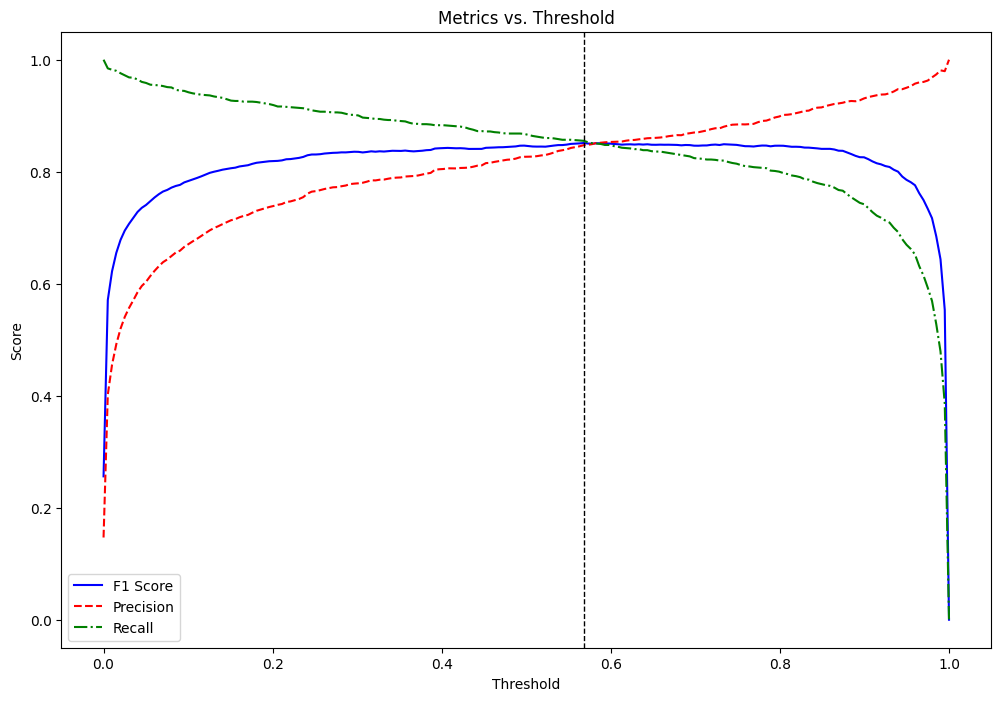

Optimal threshold is: 0.5678391959798995


In [11]:
# Assuming you've trained a classifier and obtained predicted probabilities for class 1
y_prob = model.predict_proba(test_fps)[:, 1]  

# create 200 evenly spaced thresholds between 0 and 1
thresholds = np.linspace(0, 1, 200)  
f1_scores = []
precisions = []
recalls = []

# Inside your loop
for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    f1_scores.append(f1_score(test_labels, y_pred))
    precisions.append(precision_score(test_labels, y_pred, zero_division=1))  # Add zero_division parameter
    recalls.append(recall_score(test_labels, y_pred))


# Plotting
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='red', linestyle='--')
plt.plot(thresholds, recalls, label='Recall', color='green', linestyle='-.')
plt.title('Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(False)

# Determine optimal threshold by selecting the threshold at which model F1 reaches a maximum
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot this optimal threshold as a vertical line
plt.axvline(x = optimal_threshold, color = 'k', linestyle = 'dashed', linewidth = 1)

plt.show()

print(f"Optimal threshold is: {optimal_threshold}")

### 3. Determining the optimal threshold for the `add_concat` feasibility model

In [12]:
# ----------------- Start defining fingerprinting parameters -----------------
fp_type = 'ecfp4'
cofactor_configuration = 'add_concat'
max_species = 4
dataset = 'all_BKM_rxns'
query_rules = 'all'  # either 'all' or a list like ['rule0006','rule0007']
model_type = 'XGBoost'
random_state = 42
# ----------------- End defining fingerprinting parameters -----------------

In [13]:
# specify the input filepath of the trained AdH ML model to load into memory
if dataset == 'all_AdH_rxns':
    # specify filepath to load in saved AdH model
    input_model_filepath = f'../../models/indiv_models/all_AdH_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained Monox ML model to load into memory
if dataset == 'all_Monox_rxns':
    # specify filepath to load in saved Monox model
    input_model_filepath = f'../../models/indiv_models/all_Monox_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained, consolidated ML model to load into memory
if dataset == 'all_BKM_rxns':
    if query_rules == 'all':

        # specify filepath to load in the complete, consolidated model trained on all BKM reactions
        input_model_filepath = f'../../models/consolidated_models/all_BKM_rxns_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

    else:

        # specify filepath to load in model specific to certain query rules
        input_model_filepath = f'../../models/params/{query_rules}_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

### load in selected model
model = pickle.load(open(input_model_filepath, 'rb'))

print(f'\nSaved Feasibility model loaded: {input_model_filepath}')
print('')


Saved Feasibility model loaded: ../../models/consolidated_models/all_BKM_rxns_ecfp4_XGBoost_4_add_concat.pkl



In [14]:
if dataset == 'all_AdH_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_AdH_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_Monox_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_Monox_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_BKM_rxns':

    if query_rules == 'all':
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_BKM_rxns_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

    else:
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/{query_rules}_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

In [15]:
_, fp_length = ML_utils.initialize_rxn_fp(cofactor_positioning_method = cofactor_configuration,
                                        fp_type = fp_type,
                                        max_species = max_species)

# load in fingerprints and data
test_df = pd.read_parquet(test_fps_filepath)
test_fps = test_df.iloc[:, 0:fp_length].to_numpy()
test_labels = test_df['Label'].to_numpy()

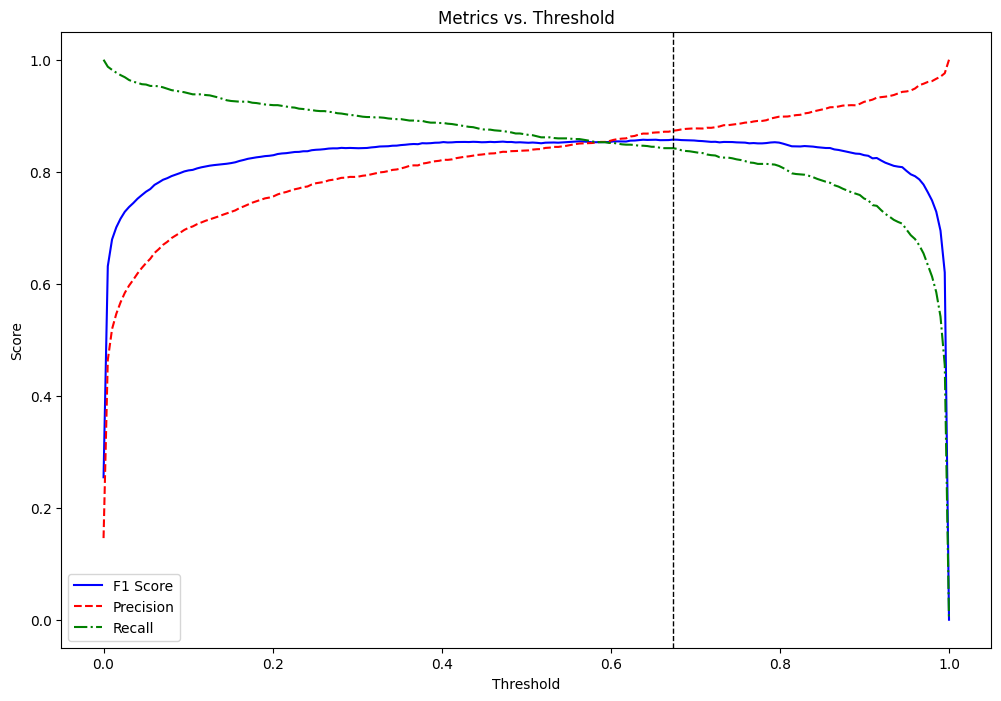

Optimal threshold is: 0.6733668341708543


In [16]:
# Assuming you've trained a classifier and obtained predicted probabilities for class 1
y_prob = model.predict_proba(test_fps)[:, 1]  

# create 200 evenly spaced thresholds between 0 and 1
thresholds = np.linspace(0, 1, 200)  
f1_scores = []
precisions = []
recalls = []

# Inside your loop
for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    f1_scores.append(f1_score(test_labels, y_pred))
    precisions.append(precision_score(test_labels, y_pred, zero_division=1))  # Add zero_division parameter
    recalls.append(recall_score(test_labels, y_pred))


# Plotting
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='red', linestyle='--')
plt.plot(thresholds, recalls, label='Recall', color='green', linestyle='-.')
plt.title('Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(False)

# Determine optimal threshold by selecting the threshold at which model F1 reaches a maximum
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot this optimal threshold as a vertical line
plt.axvline(x = optimal_threshold, color = 'k', linestyle = 'dashed', linewidth = 1)

plt.show()

print(f"Optimal threshold is: {optimal_threshold}")

### 4. Determining the optimal threshold for the `add_concat` feasibility model

In [17]:
# ----------------- Start defining fingerprinting parameters -----------------
fp_type = 'ecfp4'
cofactor_configuration = 'add_subtract'
max_species = 4
dataset = 'all_BKM_rxns'
query_rules = 'all'  # either 'all' or a list like ['rule0006','rule0007']
model_type = 'XGBoost'
random_state = 42
# ----------------- End defining fingerprinting parameters -----------------

In [18]:
# specify the input filepath of the trained AdH ML model to load into memory
if dataset == 'all_AdH_rxns':
    # specify filepath to load in saved AdH model
    input_model_filepath = f'../../models/indiv_models/all_AdH_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained Monox ML model to load into memory
if dataset == 'all_Monox_rxns':
    # specify filepath to load in saved Monox model
    input_model_filepath = f'../../models/indiv_models/all_Monox_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained, consolidated ML model to load into memory
if dataset == 'all_BKM_rxns':
    if query_rules == 'all':

        # specify filepath to load in the complete, consolidated model trained on all BKM reactions
        input_model_filepath = f'../../models/consolidated_models/all_BKM_rxns_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

    else:

        # specify filepath to load in model specific to certain query rules
        input_model_filepath = f'../../models/params/{query_rules}_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

### load in selected model
model = pickle.load(open(input_model_filepath, 'rb'))

print(f'\nSaved Feasibility model loaded: {input_model_filepath}')
print('')


Saved Feasibility model loaded: ../../models/consolidated_models/all_BKM_rxns_ecfp4_XGBoost_4_add_subtract.pkl



In [19]:
if dataset == 'all_AdH_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_AdH_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_Monox_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_Monox_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_BKM_rxns':

    if query_rules == 'all':
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_BKM_rxns_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

    else:
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/{query_rules}_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

In [20]:
_, fp_length = ML_utils.initialize_rxn_fp(cofactor_positioning_method = cofactor_configuration,
                                        fp_type = fp_type,
                                        max_species = max_species)

# load in fingerprints and data
test_df = pd.read_parquet(test_fps_filepath)
test_fps = test_df.iloc[:, 0:fp_length].to_numpy()
test_labels = test_df['Label'].to_numpy()

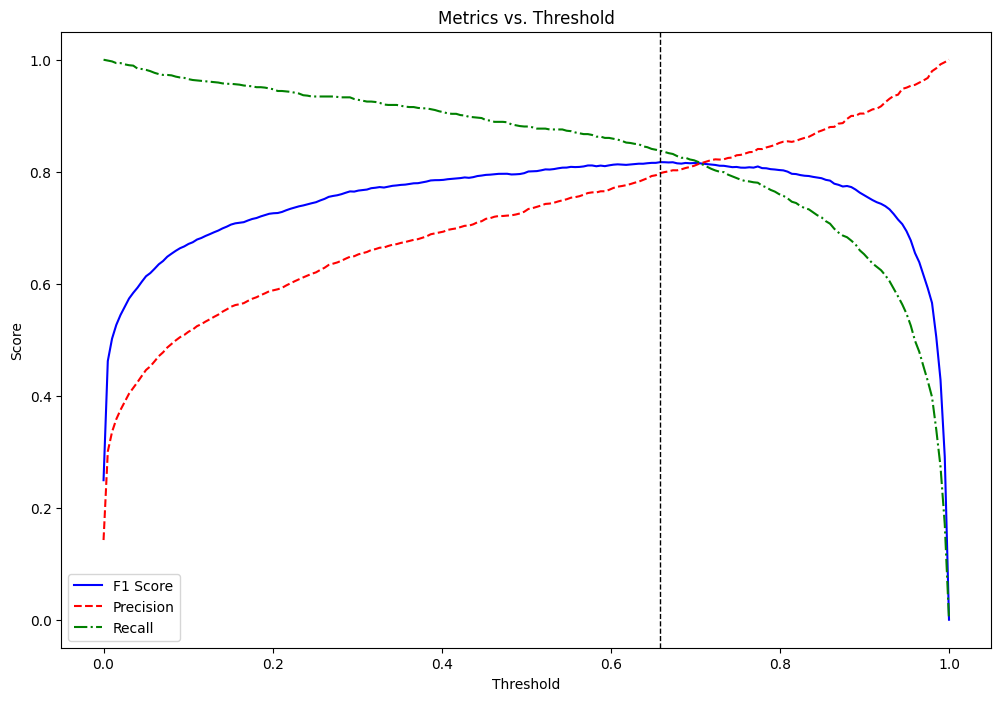

Optimal threshold is: 0.6582914572864321


In [21]:
# Assuming you've trained a classifier and obtained predicted probabilities for class 1
y_prob = model.predict_proba(test_fps)[:, 1]  

# create 200 evenly spaced thresholds between 0 and 1
thresholds = np.linspace(0, 1, 200)  
f1_scores = []
precisions = []
recalls = []

# Inside your loop
for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    f1_scores.append(f1_score(test_labels, y_pred))
    precisions.append(precision_score(test_labels, y_pred, zero_division=1))  # Add zero_division parameter
    recalls.append(recall_score(test_labels, y_pred))


# Plotting
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='red', linestyle='--')
plt.plot(thresholds, recalls, label='Recall', color='green', linestyle='-.')
plt.title('Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(False)

# Determine optimal threshold by selecting the threshold at which model F1 reaches a maximum
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot this optimal threshold as a vertical line
plt.axvline(x = optimal_threshold, color = 'k', linestyle = 'dashed', linewidth = 1)

plt.show()

print(f"Optimal threshold is: {optimal_threshold}")

### 5. Determining the optimal threshold for the `half_random` feasibility model

In [22]:
# ----------------- Start defining fingerprinting parameters -----------------
fp_type = 'ecfp4'
cofactor_configuration = 'half_random'
max_species = 4
dataset = 'all_BKM_rxns'
query_rules = 'all'  # either 'all' or a list like ['rule0006','rule0007']
model_type = 'XGBoost'
random_state = 42
# ----------------- End defining fingerprinting parameters -----------------

In [23]:
# specify the input filepath of the trained AdH ML model to load into memory
if dataset == 'all_AdH_rxns':
    # specify filepath to load in saved AdH model
    input_model_filepath = f'../../models/indiv_models/all_AdH_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained Monox ML model to load into memory
if dataset == 'all_Monox_rxns':
    # specify filepath to load in saved Monox model
    input_model_filepath = f'../../models/indiv_models/all_Monox_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained, consolidated ML model to load into memory
if dataset == 'all_BKM_rxns':
    if query_rules == 'all':

        # specify filepath to load in the complete, consolidated model trained on all BKM reactions
        input_model_filepath = f'../../models/consolidated_models/all_BKM_rxns_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

    else:

        # specify filepath to load in model specific to certain query rules
        input_model_filepath = f'../../models/params/{query_rules}_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

### load in selected model
model = pickle.load(open(input_model_filepath, 'rb'))

print(f'\nSaved Feasibility model loaded: {input_model_filepath}')
print('')


Saved Feasibility model loaded: ../../models/consolidated_models/all_BKM_rxns_ecfp4_XGBoost_4_half_random.pkl



In [24]:
if dataset == 'all_AdH_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_AdH_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_Monox_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_Monox_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_BKM_rxns':

    if query_rules == 'all':
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_BKM_rxns_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

    else:
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/{query_rules}_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

In [25]:
_, fp_length = ML_utils.initialize_rxn_fp(cofactor_positioning_method = cofactor_configuration,
                                        fp_type = fp_type,
                                        max_species = max_species)

# load in fingerprints and data
test_df = pd.read_parquet(test_fps_filepath)
test_fps = test_df.iloc[:, 0:fp_length].to_numpy()
test_labels = test_df['Label'].to_numpy()

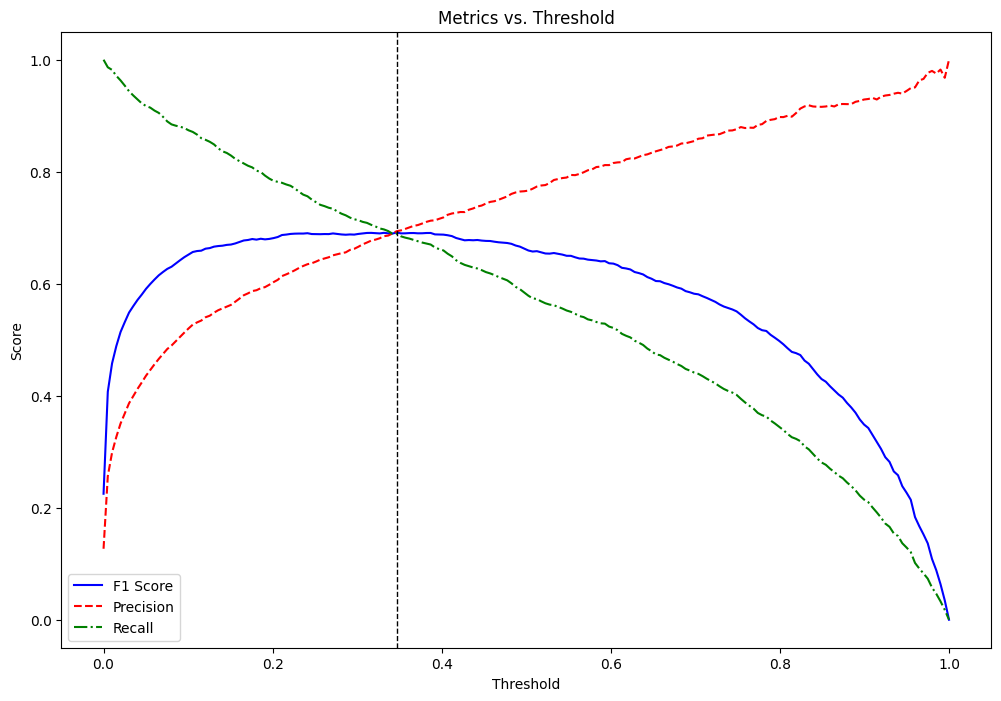

Optimal threshold is: 0.34673366834170855


In [26]:
# Assuming you've trained a classifier and obtained predicted probabilities for class 1
y_prob = model.predict_proba(test_fps)[:, 1]  

# create 200 evenly spaced thresholds between 0 and 1
thresholds = np.linspace(0, 1, 200)  
f1_scores = []
precisions = []
recalls = []

# Inside your loop
for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    f1_scores.append(f1_score(test_labels, y_pred))
    precisions.append(precision_score(test_labels, y_pred, zero_division=1))  # Add zero_division parameter
    recalls.append(recall_score(test_labels, y_pred))


# Plotting
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='red', linestyle='--')
plt.plot(thresholds, recalls, label='Recall', color='green', linestyle='-.')
plt.title('Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(False)

# Determine optimal threshold by selecting the threshold at which model F1 reaches a maximum
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot this optimal threshold as a vertical line
plt.axvline(x = optimal_threshold, color = 'k', linestyle = 'dashed', linewidth = 1)

plt.show()

print(f"Optimal threshold is: {optimal_threshold}")

### 6. Determining the optimal threshold for the `full_random` feasibility model

In [27]:
# ----------------- Start defining fingerprinting parameters -----------------
fp_type = 'ecfp4'
cofactor_configuration = 'full_random'
max_species = 4
dataset = 'all_BKM_rxns'
query_rules = 'all'  # either 'all' or a list like ['rule0006','rule0007']
model_type = 'XGBoost'
random_state = 42
# ----------------- End defining fingerprinting parameters -----------------

In [28]:
# specify the input filepath of the trained AdH ML model to load into memory
if dataset == 'all_AdH_rxns':
    # specify filepath to load in saved AdH model
    input_model_filepath = f'../../models/indiv_models/all_AdH_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained Monox ML model to load into memory
if dataset == 'all_Monox_rxns':
    # specify filepath to load in saved Monox model
    input_model_filepath = f'../../models/indiv_models/all_Monox_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

# specify the input filepath of the trained, consolidated ML model to load into memory
if dataset == 'all_BKM_rxns':
    if query_rules == 'all':

        # specify filepath to load in the complete, consolidated model trained on all BKM reactions
        input_model_filepath = f'../../models/consolidated_models/all_BKM_rxns_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

    else:

        # specify filepath to load in model specific to certain query rules
        input_model_filepath = f'../../models/params/{query_rules}_{fp_type}_{model_type}_{max_species}_{cofactor_configuration}.pkl'

### load in selected model
model = pickle.load(open(input_model_filepath, 'rb'))

print(f'\nSaved Feasibility model loaded: {input_model_filepath}')
print('')


Saved Feasibility model loaded: ../../models/consolidated_models/all_BKM_rxns_ecfp4_XGBoost_4_full_random.pkl



In [29]:
if dataset == 'all_AdH_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_AdH_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_Monox_rxns':
    test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_Monox_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

if dataset == 'all_BKM_rxns':

    if query_rules == 'all':
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_BKM_rxns_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

    else:
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/{query_rules}_{fp_type}_test_fingerprints_max_species_{max_species}_{cofactor_configuration}.parquet'

In [30]:
_, fp_length = ML_utils.initialize_rxn_fp(cofactor_positioning_method = cofactor_configuration,
                                        fp_type = fp_type,
                                        max_species = max_species)

# load in fingerprints and data
test_df = pd.read_parquet(test_fps_filepath)
test_fps = test_df.iloc[:, 0:fp_length].to_numpy()
test_labels = test_df['Label'].to_numpy()

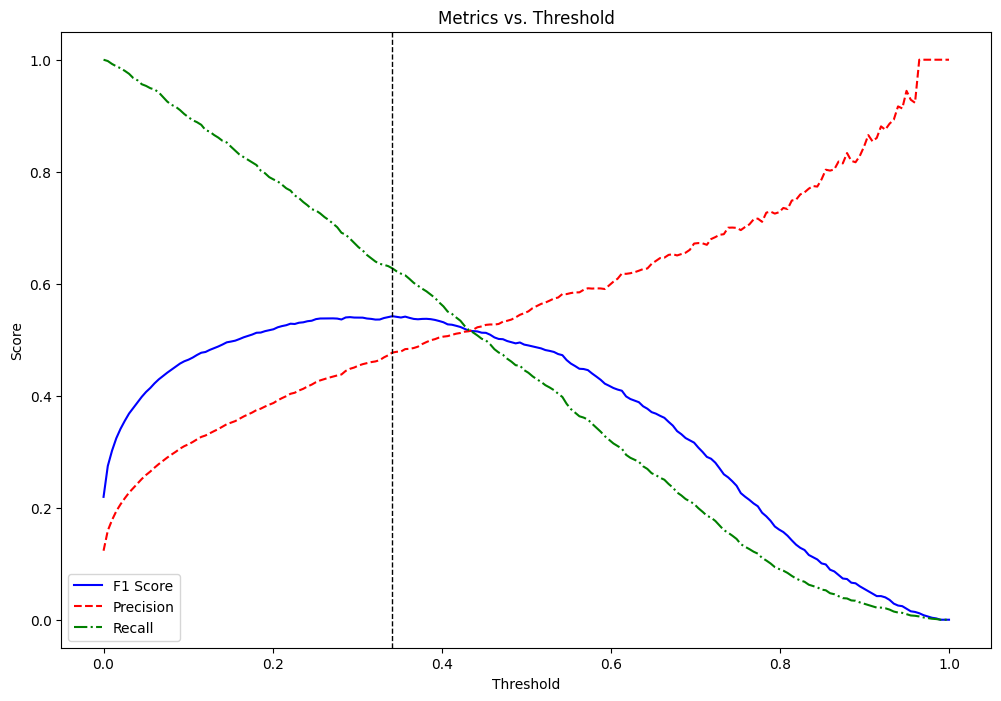

Optimal threshold is: 0.3417085427135678


In [31]:
# Assuming you've trained a classifier and obtained predicted probabilities for class 1
y_prob = model.predict_proba(test_fps)[:, 1]  

# create 200 evenly spaced thresholds between 0 and 1
thresholds = np.linspace(0, 1, 200)  
f1_scores = []
precisions = []
recalls = []

# Inside your loop
for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    f1_scores.append(f1_score(test_labels, y_pred))
    precisions.append(precision_score(test_labels, y_pred, zero_division=1))  # Add zero_division parameter
    recalls.append(recall_score(test_labels, y_pred))


# Plotting
plt.figure(figsize=(12, 8))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.plot(thresholds, precisions, label='Precision', color='red', linestyle='--')
plt.plot(thresholds, recalls, label='Recall', color='green', linestyle='-.')
plt.title('Metrics vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(False)

# Determine optimal threshold by selecting the threshold at which model F1 reaches a maximum
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Plot this optimal threshold as a vertical line
plt.axvline(x = optimal_threshold, color = 'k', linestyle = 'dashed', linewidth = 1)

plt.show()

print(f"Optimal threshold is: {optimal_threshold}")